In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime

In [20]:
# creating a variable for the file path and importing the csv with pandas to convert it into a dataframe

file_path_twitter = 'dataset.csv'
file_path_aapl = 'AAPL.csv'
df_twitter = pd.read_csv(file_path_twitter)
df_aapl = pd.read_csv(file_path_aapl)

# taking a look a the top 5 entries of data to get a better understanding of how the data is organized 

df_twitter.head()

,timestamp,Apple,Amazon,Salesforce,CVS,Facebook,Google,IBM,Coca-Cola,Pfizer,UPS
0,2015-02-26 21:42:53,104,57.0,11,0.0,53.0,35.0,7.0,8.0,3.0,2.0
1,2015-02-26 21:47:53,100,43.0,10,0.0,64.0,41.0,4.0,8.0,2.0,2.0
2,2015-02-26 21:52:53,99,55.0,3,0.0,49.0,32.0,14.0,5.0,2.0,4.0
3,2015-02-26 21:57:53,154,64.0,4,0.0,48.0,36.0,6.0,13.0,36.0,3.0
4,2015-02-26 22:02:53,120,93.0,9,0.0,22.0,32.0,1.0,22.0,8.0,5.0


In [21]:
# converting the values in the timestamp column from strings to datetime values that
# will be easier to utilize later

df_ts = df_twitter['timestamp'].tolist()
new_ts = []
for ts in df_ts:
    x = datetime.strptime(ts, '%Y-%m-%d %H:%M:%S').date()
    new_ts.append(x)

df_twitter['timestamp'] = new_ts
new_ts[0]

datetime.date(2015, 2, 26)

In [22]:
df_twitter.head()

,timestamp,Apple,Amazon,Salesforce,CVS,Facebook,Google,IBM,Coca-Cola,Pfizer,UPS
0,2015-02-26,104,57.0,11,0.0,53.0,35.0,7.0,8.0,3.0,2.0
1,2015-02-26,100,43.0,10,0.0,64.0,41.0,4.0,8.0,2.0,2.0
2,2015-02-26,99,55.0,3,0.0,49.0,32.0,14.0,5.0,2.0,4.0
3,2015-02-26,154,64.0,4,0.0,48.0,36.0,6.0,13.0,36.0,3.0
4,2015-02-26,120,93.0,9,0.0,22.0,32.0,1.0,22.0,8.0,5.0


In [24]:
df_twitter_aapl = pd.concat(df_twitter['timestamp'], df_twitter['Apple'])

C:\Users\zackf\AppData\Local\Temp\ipykernel_20524\1093909090.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_twitter_aapl = pd.concat(df_twitter['timestamp'], df_twitter['Apple'])


TypeError: first argument must be an iterable of pandas objects, you passed an object of type "Series"

<AxesSubplot:xlabel='timestamp', ylabel='Apple'>

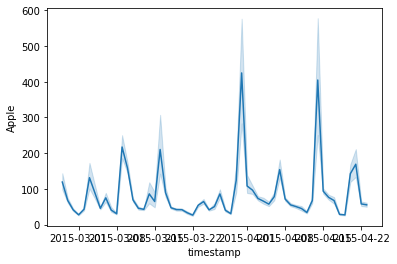

In [11]:
# making a basic lineplot of the amount of times Apple was mentioned over the timeline

sns.lineplot(data=df_twitter, x='timestamp', y='Apple')

In [12]:
# determine the earliest date

earliest_date = df_twitter['timestamp'].iloc[-1]
print(earliest_date)

2015-04-23


In [6]:
# taking a look at how the data is organized

df_aapl.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600


In [7]:
# finding out how the Date value is stored

type(df_aapl['Date'].iloc[0])

str

In [8]:
# changing the Date value from a string to a datetime value to be used more easily later

aapl_date = df_aapl['Date'].tolist()
new_aapl_date = []
for ad in aapl_date:
    x = datetime.strptime(ad, '%Y-%m-%d')
    new_aapl_date.append(x)
    
df_aapl['Date'] = new_aapl_date
df_aapl = df_aapl.rename(columns={'Date':'timestamp'})

In [9]:
# using only the relevant dates from the dataset that contains the stock information

df_aapl_needed = df_aapl.set_index('timestamp').loc[earliest_date:]
df_aapl_needed.head()

,Open,High,Low,Close,Adj Close,Volume
timestamp,,,,,,
2015-04-23,32.075001,32.605000,32.035000,32.417500,29.428137,183083600
2015-04-24,32.622501,32.657501,32.307499,32.570000,29.566570,178103600
2015-04-27,33.077499,33.282501,32.787498,33.162498,30.104433,387816800
2015-04-28,33.615002,33.634998,32.392502,32.639999,29.630119,475696000
2015-04-29,32.540001,32.897499,32.075001,32.160000,29.194382,253544400


In [15]:
twitter_aapl = df_twitter.set_index('timestamp')['Apple']
twitter_aapl = twitter_aapl.reset_index()
twitter_aapl.head()

,timestamp,Apple
0,2015-02-26,104
1,2015-02-26,100
2,2015-02-26,99
3,2015-02-26,154
4,2015-02-26,120


In [23]:
aapl_df_use = pd.concat([df_aapl_needed.reset_index(), twitter_aapl])

In [24]:
aapl_df_use.head()

,timestamp,Open,High,Low,Close,Adj Close,Volume,Apple
0,2015-04-23 00:00:00,32.075001,32.605000,32.035000,32.417500,29.428137,183083600.0,NaN
1,2015-04-24 00:00:00,32.622501,32.657501,32.307499,32.570000,29.566570,178103600.0,NaN
2,2015-04-27 00:00:00,33.077499,33.282501,32.787498,33.162498,30.104433,387816800.0,NaN
3,2015-04-28 00:00:00,33.615002,33.634998,32.392502,32.639999,29.630119,475696000.0,NaN
4,2015-04-29 00:00:00,32.540001,32.897499,32.075001,32.160000,29.194382,253544400.0,NaN
